In [91]:
import pandas as pd
import numpy as np 
import itertools
import keras
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
import cv2
import os
import tensorflow as tf
import splitfolders


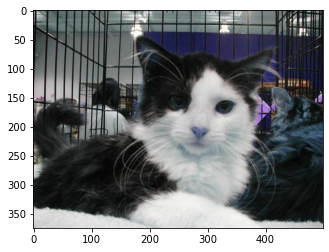

In [92]:
datadir = "/Users/abhay/Desktop/DL/images"
categories = ["cats","dogs", "panda"]

for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [93]:
train = tf.keras.preprocessing.image_dataset_from_directory('/Users/abhay/Desktop/DL/images',
                                                               subset='training',
                                                               seed=69,
                                                               image_size=(150, 150),
                                                               batch_size=32,
                                                               validation_split=0.2)

val = tf.keras.preprocessing.image_dataset_from_directory('/Users/abhay/Desktop/DL/images',
                                                               subset='validation',
                                                               seed=69,
                                                               image_size=(150, 150),
                                                               batch_size=32,
                                                               validation_split=0.2)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [94]:
# in_path = os.path.join(datadir)
# splitfolders.ratio(in_path, output="Data",
#     seed=1337, ratio=(.9, .1), group_prefix=None, move=False)

In [95]:
# print(img_array)
# print(img_array.shape)

In [96]:
# img_size = 100
# new_array = cv2.resize(img_array,(img_size,img_size))


In [97]:
# plt.imshow(new_array)
# plt.show()

In [98]:
# train = []
# datadir = "/Users/abhay/Desktop/DL/images"
# categories = ["cats","dogs", "panda"]


# def create_train():
#     for category in categories:
#         path = os.path.join(datadir,category)
#         classes = categories.index(category)
#         for img in os.listdir(path):
#             try: 
#                 img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#                 new_array = cv2.resize(img_array, (img_size,img_size))
#                 train.append([new_array,classes])
#             except Exception as e:
#                 pass

# create_train()

In [99]:
# val_path = "/Users/abhay/Desktop/DL/images"
# val = []
# def create_val():
#     for category in categories:
#         path = os.path.join(val_path,category)
#         classes = categories.index(category)
#         for img in os.listdir(path):
#             try: 
#                 img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#                 new_array = cv2.resize(img_array, (img_size,img_size))
#                 val.append([new_array,classes])
#             except Exception as e:
#                 pass
    
# create_val()

In [100]:
print(len(train))
print(len(val))

75
19


In [101]:
# for sample in val[:10]:
#     print(sample[0],sample[1])

In [102]:
# for sample in train[:10]:
#     print(sample[0],sample[1])

In [103]:
img_preprocess = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train = train.map(lambda x, y: (img_preprocess(x, training=True), y))
val = val.map(lambda x, y: (img_preprocess(x, training=True), y))

In [104]:
# # Not needed simce I found anew way to split the data
# X_train, X_val, y_train, y_val = [],[],[],[]


# for features, labels in train:
#     X_train.append(features)
#     y_train.append(labels)

# for features, labels in val:
#     X_val.append(features)
#     y_val.append(labels)

# X_train = np.array(X_train).reshape(3000,img_size,img_size,1)
# #X_val = np.array(X_val).reshape(200,100,100,1)

# y_train = np.array(y_train)
# y_val = np.array(y_val)


In [105]:
# X_train = X_train.astype('float32')
# #X_val = X_val.astype('float32')
# #Normalize it
# X_train /= 255
# #X_val /= 255

In [106]:
"""
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
"""

'\nimport pickle\n\npickle_out = open("X.pickle","wb")\npickle.dump(X,pickle_out)\npickle_out.close()\n'

In [107]:
"""
pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()
"""

'\npickle_out = open("y.pickle","wb")\npickle.dump(y,pickle_out)\npickle_out.close()\n'

In [108]:
"""
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
"""

'\npickle_in = open("X.pickle","rb")\nX = pickle.load(pickle_in)\n'

In [109]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(train, epochs=10)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(val)


MODEL TRAINING:
Epoch 1/10


2022-02-13 20:18:41.300905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 5s 59ms/step - loss: 6.5193 - accuracy: 0.4463
Epoch 2/10
75/75 [==============================] - 5s 60ms/step - loss: 0.9920 - accuracy: 0.5429
Epoch 3/10
75/75 [==============================] - 4s 58ms/step - loss: 1.0947 - accuracy: 0.3433
Epoch 4/10
75/75 [==============================] - 5s 59ms/step - loss: 1.0053 - accuracy: 0.4854
Epoch 5/10
75/75 [==============================] - 4s 57ms/step - loss: 0.9515 - accuracy: 0.5221
Epoch 6/10
75/75 [==============================] - 4s 58ms/step - loss: 0.9296 - accuracy: 0.5342
Epoch 7/10
75/75 [==============================] - 4s 57ms/step - loss: 0.9153 - accuracy: 0.5404
Epoch 8/10
75/75 [==============================] - 4s 58ms/step - loss: 0.8987 - accuracy: 0.5446
Epoch 9/10
75/75 [==============================] - 4s 57ms/step - loss: 0.8939 - accuracy: 0.5400
Epoch 10/10
75/75 [==============================] - 4s 57ms/step - loss: 0.8814 - accuracy: 0.5492

MODEL EVALUATION:
 

2022-02-13 20:19:26.330173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 1s 49ms/step - loss: 0.9823 - accuracy: 0.5117


In [110]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.990):
            print("\n Reached 99% accuracy so stopping the training")
            self.model.stop_training = True



In [111]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

callback1 = mycallback()
#Add convolutions and max pooling
model = tf.keras.models.Sequential()
model.add(Conv2D(64, (2,2), padding='same',activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2,2), padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2,2), padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

  # Add the same layers as before
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(train, epochs=50,batch_size=64,shuffle=True, validation_data=[val])



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        16448     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 37, 37, 64)       

2022-02-13 20:19:27.639081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 2.2984 - accuracy: 0.4871

2022-02-13 20:19:40.448691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 14s 170ms/step - loss: 2.2984 - accuracy: 0.4871 - val_loss: 1.5433 - val_accuracy: 0.5867
Epoch 2/50
75/75 [==============================] - 12s 161ms/step - loss: 1.3614 - accuracy: 0.6138 - val_loss: 1.3401 - val_accuracy: 0.6217
Epoch 3/50
75/75 [==============================] - 12s 164ms/step - loss: 1.1821 - accuracy: 0.6492 - val_loss: 1.1195 - val_accuracy: 0.6383
Epoch 4/50
75/75 [==============================] - 12s 161ms/step - loss: 1.0769 - accuracy: 0.6392 - val_loss: 1.0744 - val_accuracy: 0.6033
Epoch 5/50
75/75 [==============================] - 13s 167ms/step - loss: 0.9444 - accuracy: 0.6821 - val_loss: 0.9694 - val_accuracy: 0.6350
Epoch 6/50
75/75 [==============================] - 14s 184ms/step - loss: 0.8806 - accuracy: 0.6983 - val_loss: 0.9216 - val_accuracy: 0.6800
Epoch 7/50
75/75 [==============================] - 13s 173ms/step - loss: 0.8039 - accuracy: 0.7367 - val_loss: 0.8853 - val_accuracy: 0.6833
Epoch 8/50

In [112]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(val)


MODEL EVALUATION:
19/19 [==============================] - 1s 46ms/step - loss: 1.3221 - accuracy: 0.6900


In [113]:
tf.keras.models.save_model(model,"Conv2D.h5")

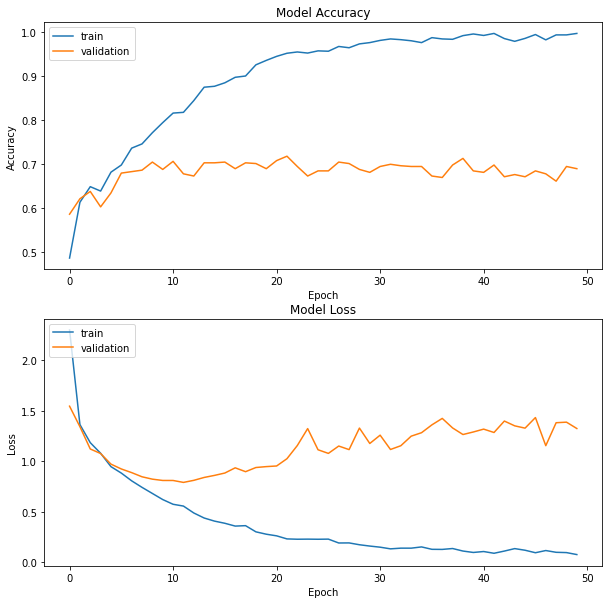

In [114]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()


In [115]:
recon_model = tf.keras.models.load_model("Conv2D.h5")

recon_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        16448     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 37, 37, 64)       

In [116]:
for i in range(9):
    recon_model.layers[i].trainable = False

In [117]:
weights = recon_model.weights

## Transfered Learning

In [118]:
#tf.keras.backend.clear_session()

In [119]:
tf.keras.applications.VGG19(input_shape=(150,150,3),include_top=False, weights='imagenet').summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [120]:


# using transfer learning

# 1. Load Pre-trained model with appropriate parameteres
# include top should be False to remove the softmax layer
tf_model = tf.keras.applications.VGG19(input_shape=(150,150,3),include_top=False, weights='imagenet')

# Freeze the layers so as not to disturb the learned weights
for layer in tf_model.layers:
   layer.trainable = False

# 2. Look at summary to chop the model
#tf_model.summary()

# 3. Freeze the base layer
# tf_model.trainable=False


# 4. Concatenate your layers
last_layer = tf_model.get_layer('block4_pool')
last_output = last_layer.output
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(3, activation='softmax')(x)

# 5. Build Keras model
transfer_learning_model = tf.keras.Model(tf_model.input, output)

transfer_learning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#transfer_learning_model.summary()

In [121]:
#transfer_learning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [122]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/Users/abhay/Desktop/DL/images',
                                                               subset='training',
                                                               seed=69,
                                                               image_size=(150, 150),
                                                               batch_size=32,
                                                               validation_split=0.2)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory('/Users/abhay/Desktop/DL/images',
                                                               subset='validation',
                                                               seed=69,
                                                               image_size=(150, 150),
                                                               batch_size=32,
                                                               validation_split=0.2)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [123]:
class_name = train_ds.class_names

In [124]:
for x,y in train_ds.take(1):
    print(x.shape, y)

(32, 150, 150, 3) tf.Tensor([0 1 2 0 1 0 0 2 2 0 2 0 1 0 2 0 1 2 1 1 0 0 0 0 0 0 1 0 1 2 1 0], shape=(32,), dtype=int32)


In [125]:
img_preprocess = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [126]:
train_ds = train_ds.map(lambda x, y: (img_preprocess(x, training=True), y))
valid_ds = valid_ds.map(lambda x, y: (img_preprocess(x, training=True), y))

In [127]:
for batch in train_ds.take(1):
    print(np.max(batch[0]), np.min(batch[0]))

1.0 0.0


In [128]:
transfer_plot = transfer_learning_model.fit(train_ds, 
                            epochs=10, 
                            validation_data=valid_ds)

Epoch 1/10


2022-02-13 20:31:45.140375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 20.0963 - accuracy: 0.6617

2022-02-13 20:32:18.755607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 43s 565ms/step - loss: 20.0963 - accuracy: 0.6617 - val_loss: 1.0281 - val_accuracy: 0.8167
Epoch 2/10
75/75 [==============================] - 46s 608ms/step - loss: 0.3077 - accuracy: 0.8896 - val_loss: 0.4933 - val_accuracy: 0.8183
Epoch 3/10
75/75 [==============================] - 47s 622ms/step - loss: 0.1129 - accuracy: 0.9608 - val_loss: 0.5298 - val_accuracy: 0.8367
Epoch 4/10
75/75 [==============================] - 48s 639ms/step - loss: 0.0629 - accuracy: 0.9771 - val_loss: 0.5837 - val_accuracy: 0.8317
Epoch 5/10
75/75 [==============================] - 51s 673ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.5605 - val_accuracy: 0.8417
Epoch 6/10
75/75 [==============================] - 52s 694ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.6604 - val_accuracy: 0.8467
Epoch 7/10
75/75 [==============================] - 49s 655ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.6258 - val_accuracy: 0.8317
Epoch 8/1

In [129]:
# for l in transfer_learning_model.layers:
#     print(l.trainable, l.name)

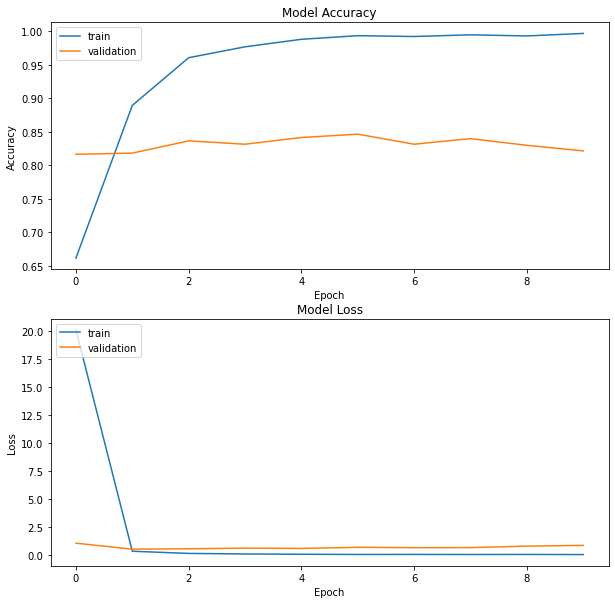

In [130]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_plot.history['accuracy'])  
plt.plot(transfer_plot.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_plot.history['loss'])  
plt.plot(transfer_plot.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [131]:
from PIL import Image

In [132]:
an_image = Image.open('/Users/abhay/Desktop/new_panda.jpeg')

In [134]:
#sec_image = Image.open('/Users/abhay/Desktop/new_pandas')

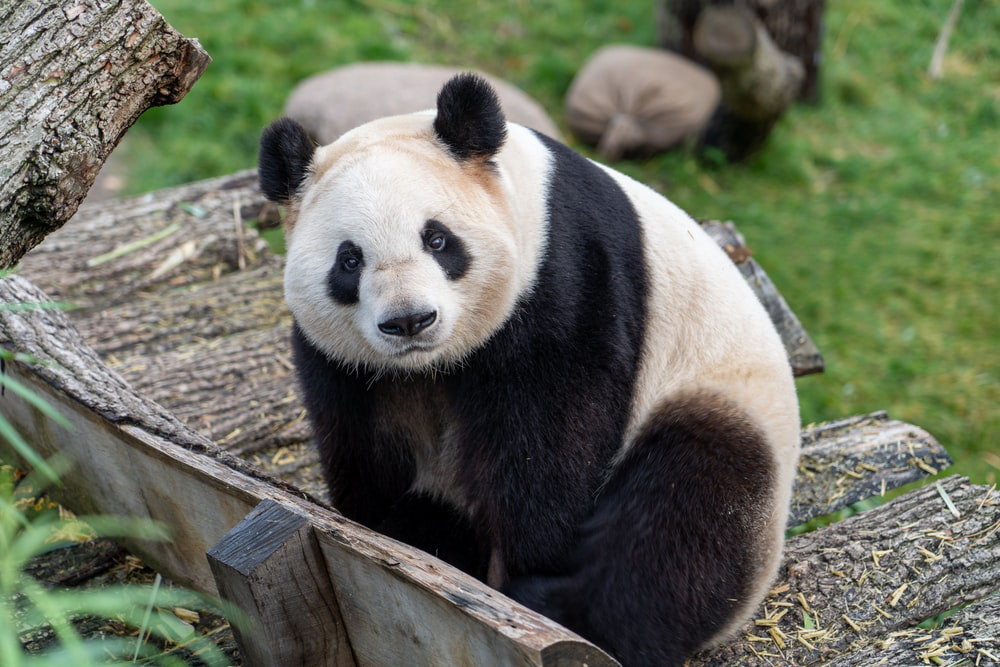

In [135]:
an_image

In [136]:

img_array = np.array(an_image)

In [137]:
img_array.shape

(667, 1000, 3)

In [138]:
#rescale and normalize
resize_normalize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(150, 150),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
]
)


In [139]:
rescaled_img = resize_normalize(img_array)

In [140]:
rescaled_img.shape

TensorShape([150, 150, 3])

In [141]:
np.max(rescaled_img)

0.99915695

In [142]:
np.min(rescaled_img)

0.0

## The image is pre-processed and we need to add a new axis to pass to the model


In [143]:
## Add an extra dimension so model can predict
rescaled_img = rescaled_img[np.newaxis, ...]

In [144]:
rescaled_img.shape

TensorShape([1, 150, 150, 3])

In [145]:
probablities = transfer_learning_model.predict(rescaled_img)

2022-02-13 20:40:51.519236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [146]:
np.argmax(probablities)

2

In [147]:
class_name[np.argmax(probablities)]

'panda'

The image passed is a panda


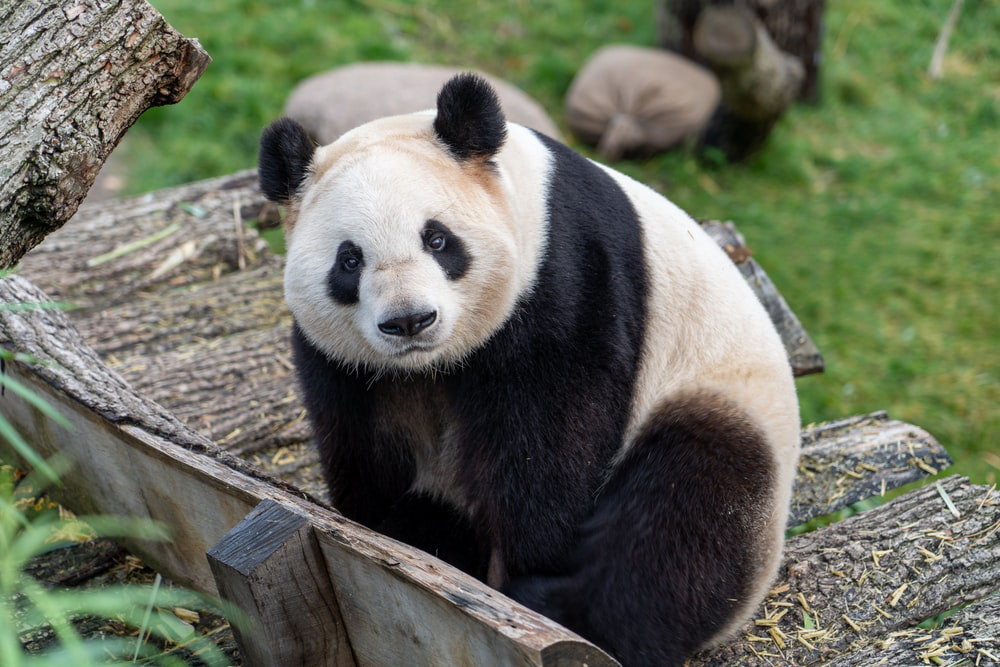

In [148]:
print('The image passed is a', class_name[np.argmax(probablities)])
an_image